<a href="https://colab.research.google.com/github/nEH2001/Customer_Segmentation/blob/main/Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

**Loading the data**

In [ ]:
#importing the data into the notebook
mall_customer_data = pd.read_csv("/content/Mall_Customers.csv")

**Knowing the data**

In [ ]:
#viewing thefirst 5 rows from the dataset
mall_customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding the number of rows and columns of the dataset
mall_customer_data.shape

(200, 5)

*There are 200 rows that i.e details about 200 customers and 5 columns in the dataset*

In [ ]:
#getting info regarding the datatype about the data
mall_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#finding if there are any missing values in the dataset
mall_customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

*There are no null values in the dataset*

**Removing the unwanted columns**

In [ ]:
#from the dataset last 2 columns are only the necessary ones
#Making a new dataset X having the last 2 columns from the mall_customer_data dataset

X= mall_customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Finding the number of clusters that are going to be formed**

Here we use WCSS(within cluster sum of square) method

In [ ]:
# using the loop

wcss =[]

for i in range (1,11):
  kmeans = KMeans(n_clusters =i , init="k-means++" , random_state = 1)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plotting an elbow curve to find the number of clusters

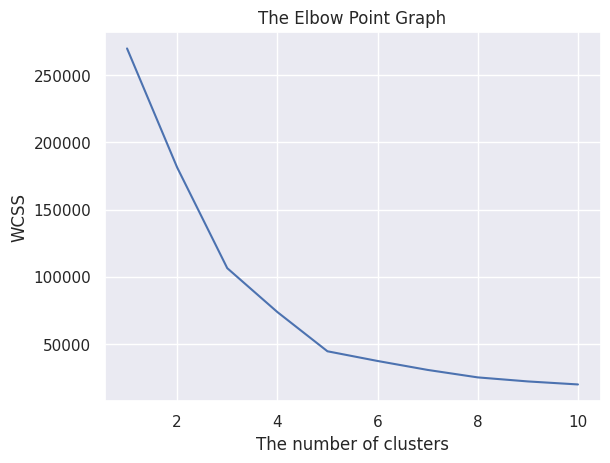

In [ ]:
sns.set()

plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("The number of clusters")
plt.ylabel("WCSS")
plt.show()

The curve is breaked at point 3 and 5. We will consider the later break, i.e. 5.
Therefore, the whole dataset is divided into 5 clusters.

**Training the K-Means model**

In [ ]:
 kmeans =KMeans(n_clusters = 5, init = "k-means++" , random_state=1)

In [ ]:
#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualizing the clusters**

Text(0, 0.5, 'Spending Score of Customers')

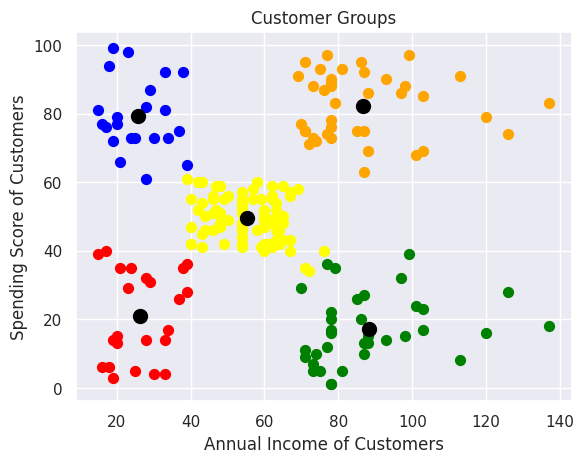

In [ ]:
#plotting the clusters

plt.scatter(X[Y==0,0],X[Y==0,1],s= 50, c="blue", label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s= 50, c="green", label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s= 50, c="yellow", label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s= 50, c="orange", label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s= 50, c="red", label="Cluster 5")

#plotting the centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c="black",
            label ="Centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income of Customers")
plt.ylabel("Spending Score of Customers")

**Insights**

**Cluster 1 (represented by color blue):**
The customers of this cluster tend to spend more while shopping even though they their annual income is less compared to other customers.

**Cluster 2 (represented by color green):** The customers of this cluster tend to spend less while shopping even though they their annual income is more compared to other customers.

**Cluster 3 (represented by color yellow):** The customers of this cluster tend to spend average amount of money, not too high not too low while shopping. Also their annual income is average, which means they shop equivalent to their income.

**Cluster 4 (represented by color orange):** The customers of this cluster tend to spend more while shopping, also their annual income is more compared to other customers and can be equivalent to customers of cluster 2.

**Cluster 5 (represented by color red):** The customers of this cluster tend to spend less while shopping, also their annual income is less compared to other customers and can be equivalent to customers of cluster 1.